# Time Series Modelling To Predict Global Temperature

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## (1)  Is there a global warming?
   - Let's read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [7]:
global_temp = pd.read_csv('GlobalTemperatures.csv')

In [8]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
global_temp['dt'][0].split('-')

['1750', '01', '01']

In [10]:
def fetch_year(date):
    return date.split('-')[0]

In [11]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [12]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [13]:
global_temp.shape

(3192, 10)

In [14]:
global_temp = global_temp.dropna(how = "any", axis = 0)

In [15]:
global_temp.shape

(1992, 10)

### Perform Aggregate on LandAverageTemperature and Uncertainity

In [8]:
data = global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [9]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


### Obtain the Uncertainity of the Data

In [10]:
data['Uncertainity_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [11]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [12]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainity_top', 'Uncertainity_bottom'],
      dtype='object')

### Use Plotly to plot the Time Series Data

In [41]:
fig=px.line(data,x='years',y=['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom'],title='(Blue Line) : Global Average Land Temperature Change from 1750 to 2015')
fig.show()

    From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

## Analyse Average Temperature in each Season

In [14]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [15]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [72]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [73]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
month                                                 int64
season                                               object
dtype: object

In [78]:
global_temp['month']=global_temp['dt'].dt.month

In [80]:
global_temp.dropna(inplace = True, how = 'all')

In [81]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


### Fetch which Season is a Month Likely to Lie in

In [82]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [83]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [84]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [23]:
years=global_temp['years'].unique()

In [24]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [25]:
for year in years:
    current_df=global_temp[global_temp['years']==year]
    spring_temps.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

In [26]:
season=pd.DataFrame()

In [27]:
season['year']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [28]:
season.head()

,year,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [46]:
season.columns

Index(['year', 'spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'], dtype='object')

In [47]:
fig=px.line(season,x='year',y=['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'],title='Avg Temp in Each Season')
fig.show()

    Is it getting warmer? Yes, it is.

### Lets Build a Time Series Model

In [48]:
cities=pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [49]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [50]:
cities.shape

(8599212, 7)

In [51]:
usa = cities[cities['Country']=='United States']

In [52]:
usa.shape

(687289, 7)

In [53]:
data=['New York','Los Angeles','San Francisco']

In [54]:
data2=usa[usa['City'].isin(data)]

In [55]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [56]:
data2=data2[['dt','AverageTemperature']]

In [57]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [58]:
data2.columns=['Date','Temp']

In [59]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [60]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [61]:
data2['Date']=pd.to_datetime(data2['Date'])

In [62]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

In [63]:
data2.dropna(inplace=True)

In [64]:
data2.shape

(7073, 2)

In [65]:
### note: for Machine Learning,feature is a columns & we have by-default index as from 0 but for our time series Problem,we have date column our as row-index
data2.set_index('Date',inplace=True)

In [66]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


<AxesSubplot:xlabel='Date', ylabel='Temp'>

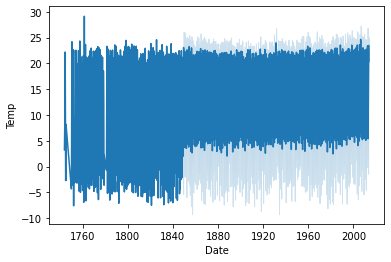

In [67]:
sns.lineplot(x=data2.index,y=data2['Temp'])

In [ ]:
##so what exactly is a stationery data, so data that has no trend no that has constant mean & std dev throughout data
## & we will observe in the 1780s, we have little bit spike over here

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#apply adfuller on data2['Temp']
test_result=adfuller(data2['Temp'])

In [ ]:
#if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

#Ho: ie null hypoIt is non stationary
#H1: ie Alternate Hypo ,It is stationary


In [43]:
def adfuller_test(Temp):
    result=adfuller(Temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [68]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(data2['Temp'])

NameError: name 'adfuller' is not defined

In [69]:
df=data2.copy()

In [70]:
df.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [ ]:
df['first_temp_diff']=df['Temp']-df['Temp'].shift(12)

In [ ]:
df.head(20)

In [ ]:
adfuller_test(df['first_temp_diff'].dropna())

In [ ]:
df[['first_temp_diff']].plot(figsize=(30,15))

### Examine whether there is a seasonality factor in your data or not¶

In [42]:
data2.head()

NameError: name 'data2' is not defined

In [ ]:
data2['month']=data2.index.month

In [ ]:
data2['year']=data2.index.year

In [ ]:
data2.head()

In [ ]:
pivot=data2.pivot_table(values='Temp',index='month',columns='year')

In [ ]:
pivot

In [ ]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

    looking this graph,we can say this data is seasonal The series clearly has some seasonality, the higher temperatures are around b/w June & August and the lower are between December & Feb so thats basically a observation that u can drawn and represent to ur client¶

In [ ]:
monthly_seasonality=pivot.mean(axis=1)

In [ ]:
monthly_seasonality.plot(figsize=(20,6))

In [ ]:
df.head()

In [ ]:
df=df[['first_temp_diff']]

In [ ]:
df.head()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

In [ ]:
### smoothening your Time Series data

In [ ]:
df['first_temp_diff'].rolling(window=5).mean()

In [ ]:
value=pd.DataFrame(df['first_temp_diff'])

In [ ]:
temp_df=pd.concat([value,df['first_temp_diff'].rolling(window=5).mean()],axis=1)

In [ ]:
temp_df.columns=['actual_temp','forecast_temp']

In [ ]:
temp_df.head(20)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
### then check accuracy
np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:]))

In [ ]:
### Lets Implement ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df.head()

In [ ]:
plot_acf(df['first_temp_diff'].dropna())

In [ ]:
plot_pacf(df['first_temp_diff'].dropna())

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
training_data=df[0:6000]
### create test that is basically unseen to our model, or which is basocally is used for evalaution
test_data=df[6000:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima=ARIMA(training_data,order=(2,1,3))

In [ ]:
model=arima.fit()

In [ ]:
predictions=model.forecast(steps=len(test_data))[0]

In [ ]:
np.sqrt(mean_squared_error(test_data,predictions))

#### model Tuning or Hyperparameter Tuning or choosing the best pair of (p,d,q

In [ ]:
p_values=range(0,4)
q_values=range(0,4)
d_values=range(0,3)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df[0:6000]
            test=df[6000:]
            predictions=[]
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    model=arima.fit(disp=0)
                    pred=model.forecast()[0]
                    predictions.append(pred)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue